In [1]:
# Train deep learning models to predict age and gender.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [2]:
path = "UTKFace"
images = []
age = []
gender = []
for img in os.listdir(path):
    ages = img.split("_")[0]
    genders = img.split("_")[1]
    img = cv2.imread(str(path)+"/"+str(img))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(np.array(img))
    age.append(np.array(ages))
    gender.append(np.array(genders))
age = np.array(age,dtype=np.int64)
images = np.array(images)   #Forgot to scale image for my training. Please divide by 255 to scale. 
gender = np.array(gender,np.uint64)

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)

In [3]:
age_model = Sequential()
age_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(200,200,3)))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))
              
age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(1, activation='linear', name='age'))
              
age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())              
                           
history_age = age_model.fit(x_train_age, y_train_age,
                        validation_data=(x_test_age, y_test_age), epochs=50)

age_model.save('age_model_50epochs.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 256)      0

Epoch 44/50
556/556 [==============================] - 1944s 3s/step - loss: 38.3386 - mae: 4.6517 - val_loss: 88.6269 - val_mae: 6.8597
Epoch 45/50
556/556 [==============================] - 1970s 4s/step - loss: 36.4664 - mae: 4.5521 - val_loss: 93.3118 - val_mae: 6.8239
Epoch 46/50
556/556 [==============================] - 2005s 4s/step - loss: 36.1151 - mae: 4.5258 - val_loss: 96.7836 - val_mae: 6.9979
Epoch 47/50
556/556 [==============================] - 1963s 4s/step - loss: 36.8885 - mae: 4.5563 - val_loss: 93.2679 - val_mae: 6.7531
Epoch 48/50
556/556 [==============================] - 2032s 4s/step - loss: 33.2769 - mae: 4.3436 - val_loss: 88.7750 - val_mae: 6.6957
Epoch 49/50
556/556 [==============================] - 2023s 4s/step - loss: 32.3784 - mae: 4.3023 - val_loss: 90.2154 - val_mae: 6.6768
Epoch 50/50
556/556 [==============================] - 1901s 3s/step - loss: 31.8715 - mae: 4.2716 - val_loss: 90.2494 - val_mae: 6.7528


In [4]:
#Define gender model and train
##################################################
gender_model = Sequential()

gender_model.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(200,200,3)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gender = gender_model.fit(x_train_gender, y_train_gender,
                        validation_data=(x_test_gender, y_test_gender), epochs=50)

gender_model.save('gender_model_50epochs.h5')

Epoch 1/50
556/556 [==============================] - 641s 1s/step - loss: 0.7788 - accuracy: 0.6934 - val_loss: 0.4514 - val_accuracy: 0.7950
Epoch 2/50
556/556 [==============================] - 633s 1s/step - loss: 0.4297 - accuracy: 0.8027 - val_loss: 0.3647 - val_accuracy: 0.8318
Epoch 3/50
556/556 [==============================] - 661s 1s/step - loss: 0.3822 - accuracy: 0.8278 - val_loss: 0.4593 - val_accuracy: 0.7861
Epoch 4/50
556/556 [==============================] - 662s 1s/step - loss: 0.3507 - accuracy: 0.8453 - val_loss: 0.3268 - val_accuracy: 0.8554
Epoch 5/50
556/556 [==============================] - 649s 1s/step - loss: 0.3333 - accuracy: 0.8523 - val_loss: 0.3083 - val_accuracy: 0.8598
Epoch 6/50
556/556 [==============================] - 659s 1s/step - loss: 0.3197 - accuracy: 0.8550 - val_loss: 0.3037 - val_accuracy: 0.8596
Epoch 7/50
556/556 [==============================] - 664s 1s/step - loss: 0.3167 - accuracy: 0.8577 - val_loss: 0.2991 - val_accuracy: 0.8665

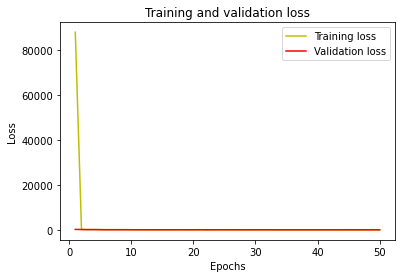

KeyError: 'accuracy'

In [5]:
history = history_age
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy =  0.8797030538214948


<AxesSubplot:>

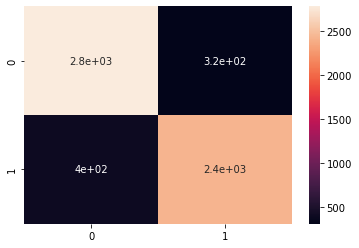

In [11]:
from keras.models import load_model
#Test the model
my_model = load_model('gender_model_50epochs.h5', compile=False)


predictions = my_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)  
sns.heatmap(cm, annot=True)